`seaborn` 库中的 `sns.boxplot()` 和 `sns.boxenplot()` 都是用于可视化数据分布的箱型图变体，但它们在展示数据细节和适用场景上有所不同。下面详细对比两者的特点、用途和差异：

## **1. `sns.boxplot()`（标准箱线图）**
### **基本功能**
- 绘制传统的**箱线图（Box Plot）**，基于 Tukey 的五数概括法展示数据分布：
  - **中位数（Q2）**：箱体中间的线。
  - **四分位数（Q1 和 Q3）**：箱体的下边缘和上边缘（分别对应第25和第75百分位数）。
  - **箱须（Whiskers）**：默认延伸至 1.5 × IQR（四分位距）内的数据点，超出此范围的视为离群值（用点标记）。

### **示例代码**
```python
import seaborn as sns
sns.set_theme(style="whitegrid")

diamonds = sns.load_dataset("diamonds")
sns.boxplot(data=diamonds, x="clarity", y="carat", order=clarity_ranking, color="b")
```

### **特点**
1. **简洁性**：适合快速查看数据的中位数、离散度和离群值。
2. **局限性**：
   - 仅显示有限的统计量（5个关键点），可能掩盖大数据集的细节。
   - 对长尾分布或偏态数据的表达能力较弱。

## **2. `sns.boxenplot()`（增强箱线图）**
### **基本功能**
- 也称为 **Letter-value Plot**，是箱线图的增强版，通过**多层级分位数**更细致地描述数据分布：
  - 箱体数量更多（通常6-8层），每层代表不同深度的分位数（如第95、99百分位等）。
  - 更适合展示大数据或长尾分布。

### **示例代码**
```python
sns.boxenplot(
    data=diamonds, x="clarity", y="carat",
    order=clarity_ranking, color="b", width_method="linear"
)
```

### **特点**
1. **细节丰富**：
   - 通过更多箱体揭示分布的尾部行为（如极端值、偏态）。
   - 比 `boxplot` 更不容易掩盖数据特征。
2. **适用场景**：
   - 大数据集（如超过 1k 个样本）。
   - 分布不对称或存在多重模态时。
3. **参数控制**：
   - `width_method`：调整箱体宽度（如 `"linear"` 或 `"area"`）。
   - `k_depth`：控制分位数的层级数（默认为 "proportionate"）。

## **3. 核心区别对比**
| 特性                | `sns.boxplot()`                  | `sns.boxenplot()`                     |
|---------------------|----------------------------------|---------------------------------------|
| **数据量**          | 适合小到中型数据                 | 适合大型数据（>1k 样本）              |
| **细节展示**        | 仅显示中位数、IQR 和离群值       | 多层级分位数，揭示分布尾部细节        |
| **离群值处理**      | 明确标记离群点                   | 通过箱体层级隐含离群信息              |
| **可视化复杂度**    | 简单                             | 更复杂（更多箱体）                    |
| **适用场景**        | 快速概览分布                     | 深入分析分布形态（如偏态、长尾）      |

## **4. 如何选择？**
- **用 `boxplot` 如果**：
  - 数据量较小。
  - 只需快速查看中位数、离散度和离群值。
- **用 `boxenplot` 如果**：
  - 数据量大或分布复杂。
  - 需要分析尾部细节（如极端值、偏态）。

## **总结**
- **`boxplot`**：简洁、通用，适合初步分析。
- **`boxenplot`**：强大、详细，适合深入探索大数据分布。  
根据数据规模和需求选择即可！

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
530,1,2,female,2.0,1,1,26.0000,S,Second,child,False,NaN,Southampton,yes,False
700,1,1,female,18.0,1,0,227.5250,C,First,woman,False,C,Cherbourg,yes,False
573,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
834,0,3,male,18.0,0,0,8.3000,S,Third,man,True,NaN,Southampton,no,True
108,0,3,male,38.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
324,0,3,male,NaN,8,2,69.5500,S,Third,man,True,NaN,Southampton,no,False
355,0,3,male,28.0,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
102,0,1,male,21.0,0,1,77.2875,S,First,man,True,D,Southampton,no,False
94,0,3,male,59.0,0,0,7.2500,S,Third,man,True,NaN,Southampton,no,True
647,1,1,male,56.0,0,0,35.5000,C,First,man,True,A,Cherbourg,yes,True


<Axes: xlabel='class', ylabel='age'>

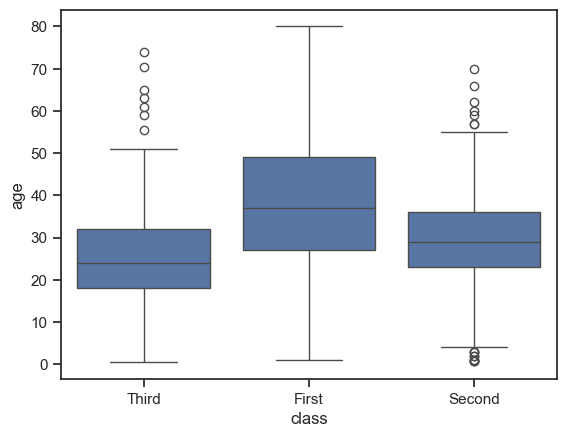

In [4]:
# 以'titanic'数据集为例，我们首先来探索不同的'class'（船舱）下的乘客的'age'（年龄）情况。
sns.set_theme(style="ticks")
titanic = pd.read_csv("seaborn-data/titanic.csv")
display(titanic.sample(10))
sns.boxplot(x='class',y='age',data=titanic)

<Axes: xlabel='class', ylabel='age'>

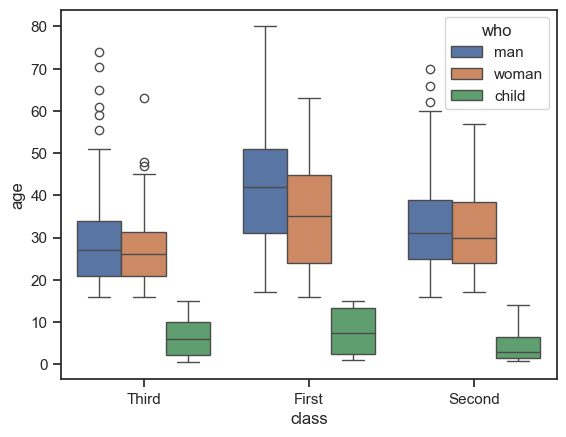

In [5]:
# 同样的，可以通过传入'hue'的参数，来对x轴的字段进行细分，这里我们通过'who'来进行分类观察。
sns.boxplot(x='class',y='age',hue='who',data=titanic)

<Axes: xlabel='age', ylabel='class'>

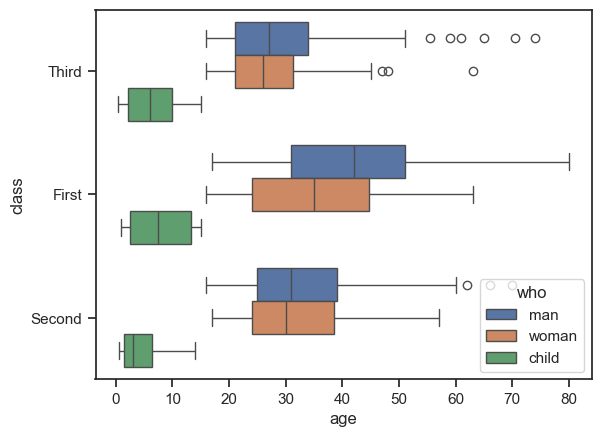

In [6]:
# 我们也可以通过调换x/y轴，实现箱线图的横向显示。
sns.boxplot(x='age',y='class',hue='who',data=titanic)

<Axes: xlabel='class', ylabel='age'>

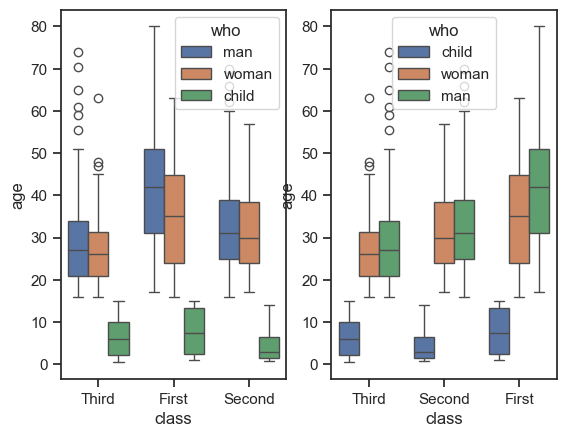

In [7]:
# 调节'order' 和 'hue_order' 参数，我们可以控制x轴展示的顺序。
fig,axes=plt.subplots(1,2) 
sns.boxplot(x='class',y='age',hue='who',
                    data=titanic,ax=axes[0])
sns.boxplot(x='class',y='age',hue='who',data=titanic,
                    order=['Third','Second','First'],
                    hue_order=['child','woman','man'],ax=axes[1])

<Axes: xlabel='class', ylabel='age'>

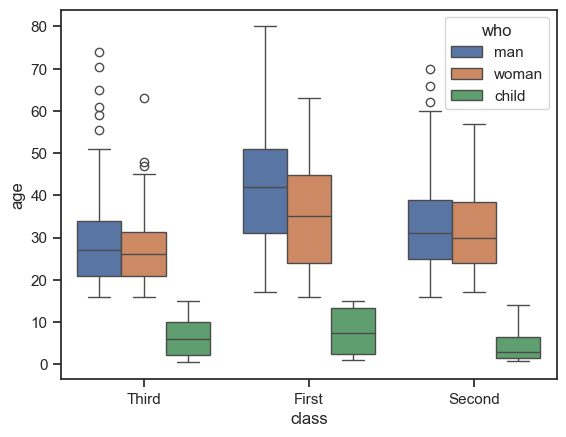

In [8]:
# 可以通过'linewidth'参数，控制线条的粗细。我们把'linewidth'参数设为1，就可以看到整体图形的线条变细，你可以根据自己的需要调节。
sns.boxplot(x='class',y='age',hue='who',
                    linewidth=1,data=titanic)

这段代码使用了 seaborn 和 pandas 来加载和可视化小费数据集（tips），并绘制了一个嵌套箱线图（boxplot）。

,total_bill,tip,sex,smoker,day,time,size
71,17.07,3.00,Female,No,Sat,Dinner,3
59,48.27,6.73,Male,No,Sat,Dinner,4
189,23.10,4.00,Male,Yes,Sun,Dinner,3
172,7.25,5.15,Male,Yes,Sun,Dinner,2
162,16.21,2.00,Female,No,Sun,Dinner,3
238,35.83,4.67,Female,No,Sat,Dinner,3
4,24.59,3.61,Female,No,Sun,Dinner,4
110,14.00,3.00,Male,No,Sat,Dinner,2
227,20.45,3.00,Male,No,Sat,Dinner,4
78,22.76,3.00,Male,No,Thur,Lunch,2


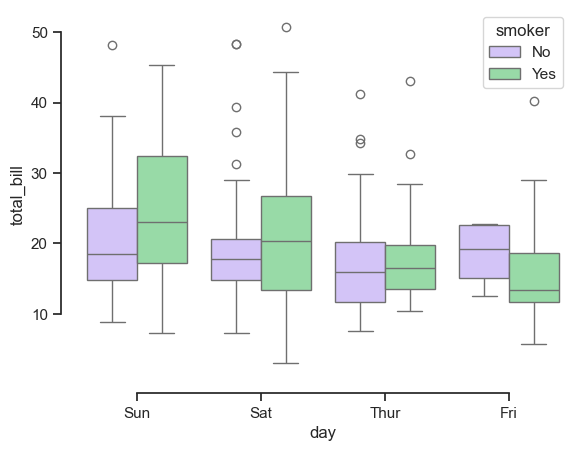

In [10]:
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
tips = pd.read_csv("seaborn-data/tips.csv")
display(tips.sample(10))

# Draw a nested boxplot to show bills by day and time
sns.boxplot(
    x="day",            # x 轴：星期几（Thur, Fri, Sat, Sun）
    y="total_bill",     # y 轴：账单总金额
    hue="smoker",       # 按是否吸烟分组（No / Yes）
    palette=["m", "g"], # 颜色（m=品红，g=绿色）
    data=tips           # 数据来源
)

# # sns.despine()：移除图表顶部和右侧的边框线（默认 seaborn 风格）。
sns.despine(
        offset=10,  # 使坐标轴稍微偏移，避免图表紧贴边缘。
        trim=True   # 移除超出数据范围的坐标轴部分，使图表更紧凑。
    )

,carat,cut,color,clarity,depth,table,price,x,y,z
50822,0.72,Ideal,E,SI2,61.8,55.0,2308,5.77,5.75,3.56
21486,1.22,Ideal,F,VS1,61.5,56.0,9581,6.84,6.89,4.22
23082,1.34,Ideal,H,IF,60.9,57.0,11109,7.09,7.19,4.35
46063,0.70,Premium,J,SI1,61.3,59.0,1735,5.73,5.75,3.52
39370,0.50,Very Good,D,SI2,58.5,60.0,1074,5.19,5.21,3.04
36616,0.32,Ideal,G,SI1,62.5,55.0,477,4.35,4.38,2.73
45079,0.54,Good,D,VS2,60.9,60.0,1644,5.28,5.36,3.24
15910,1.04,Very Good,F,VS2,61.0,60.0,6361,6.54,6.48,3.97
51819,0.51,Premium,E,VVS2,59.3,59.0,2419,5.25,5.17,3.09
14081,1.01,Very Good,F,SI1,63.5,57.0,5713,6.38,6.31,4.03


<Axes: xlabel='clarity', ylabel='carat'>

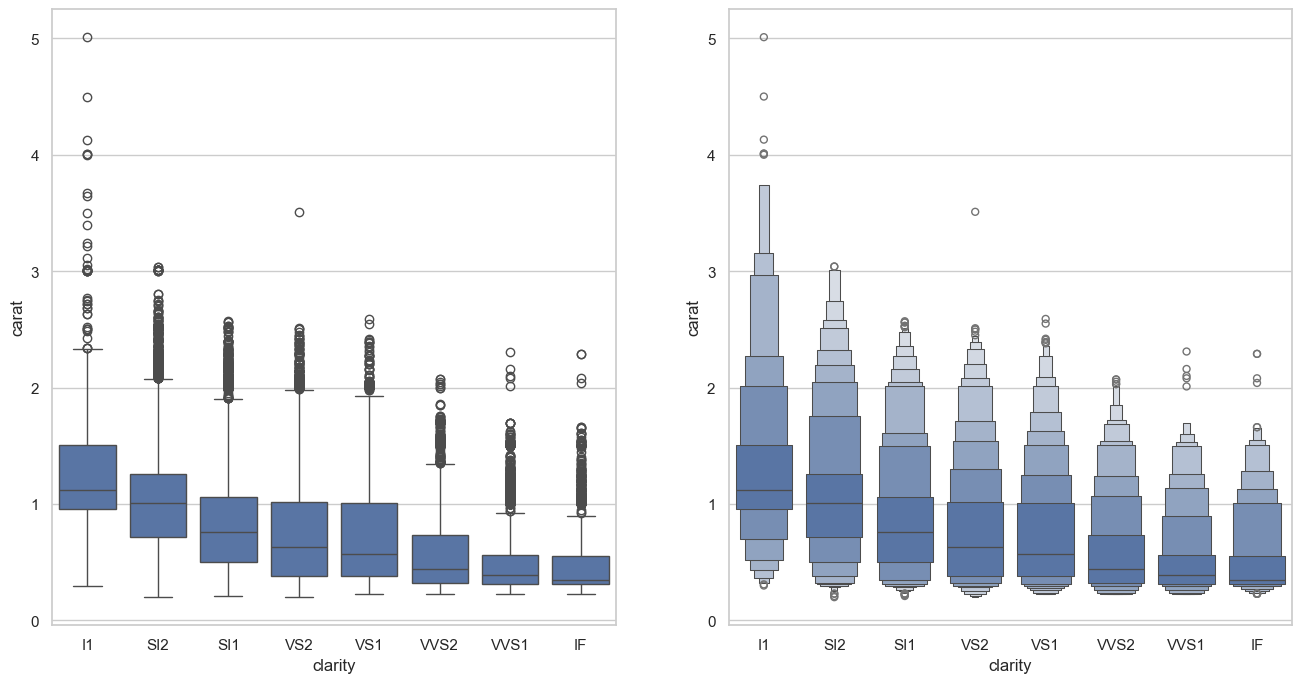

In [8]:
sns.set_theme(style="whitegrid")
# 从 Seaborn 的内置数据集中加载名为 diamonds 的数据（包含钻石的价格、克拉、颜色、净度等特征）。
diamonds = pd.read_csv("seaborn-data/diamonds.csv")
display(diamonds.sample(10))

# fig, axes = plt.subplots(1, 2, figsize=(12, 8))
fig = plt.figure(figsize=(16, 8))
axes= fig.subplots(1,2)

# 这是一个自定义的列表，定义了钻石净度（clarity）的等级顺序，从最低（I1，内含级）到最高（IF，内部无瑕级）。
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

# 绘制一个普通箱线图
sns.boxplot(
    diamonds,
    x="clarity",    # 将净度（clarity）作为 x 轴变量
    y="carat",      # 将克拉数（carat）作为 y 轴变量
    color="b",      # 设置箱体颜色为蓝色（"b" 是 "blue" 的缩写）
    order=clarity_ranking,  # 指定 x 轴类别的顺序为之前定义的 clarity_ranking
    ax=axes[0]
)

# 绘制一个增强箱线图（也称为 Letter-value plot），适用于展示大数据分布，比传统箱线图更能体现分布细节。
sns.boxenplot(
    diamonds,
    x="clarity",    # 将净度（clarity）作为 x 轴变量
    y="carat",      # 将克拉数（carat）作为 y 轴变量
    color="b",      # 设置箱体颜色为蓝色（"b" 是 "blue" 的缩写）
    order=clarity_ranking,  # 指定 x 轴类别的顺序为之前定义的 clarity_ranking
    width_method="linear",  # 控制箱体宽度的计算方法，"linear" 表示宽度与样本量的平方根成正比。
    ax=axes[1]
)